# 1. Data Cleaning & Preparation

## 1.1 Load Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_error

## 1.2 Load The Data from csv

In [2]:
# load the dataset
gdp_data = pd.read_csv('gdpWorld.csv',decimal=',')
gdp_data.describe(include='all')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


## 1.3 Convert Columns to Numeric , Handling The Missing Values & Normalize Column Names

In [3]:
# Columns to convert
columns_to_convert = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 
                      'Net migration', 'Infant mortality (per 1000 births)', 
                      'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 
                      'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 
                      'Deathrate', 'Agriculture', 'Industry', 'Service']

# Convert columns with commas to numeric
for col in columns_to_convert:
    if gdp_data[col].dtype == 'object':
        gdp_data[col] = gdp_data[col].str.replace(',', '').astype(float)

# Identify numeric columns
numeric_columns = gdp_data.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values with the mean of the column
gdp_data[numeric_columns] = gdp_data[numeric_columns].fillna(gdp_data[numeric_columns].mean())

# Rename columns for easier access
gdp_data.columns = ['Country', 'Region', 'Population', 'Area_sq_mi', 
                    'Pop_Density_per_sq_mi', 'Coastline_ratio', 'Net_migration', 
                    'Infant_mortality_per_1000', 'GDP_per_capita', 'Literacy', 
                    'Phones_per_1000', 'Arable', 'Crops', 'Other', 'Climate', 
                    'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 
                    'Service']

# Verify the conversions
print(gdp_data.dtypes)


Country                       object
Region                        object
Population                     int64
Area_sq_mi                     int64
Pop_Density_per_sq_mi        float64
Coastline_ratio              float64
Net_migration                float64
Infant_mortality_per_1000    float64
GDP_per_capita               float64
Literacy                     float64
Phones_per_1000              float64
Arable                       float64
Crops                        float64
Other                        float64
Climate                      float64
Birthrate                    float64
Deathrate                    float64
Agriculture                  float64
Industry                     float64
Service                      float64
dtype: object


# 2. Exploratory Data Analysis (EDA)

## 2.1 Summary Statistics

In [4]:
# Summary statistics
print(gdp_data.describe())


         Population    Area_sq_mi  Pop_Density_per_sq_mi  Coastline_ratio  \
count  2.270000e+02  2.270000e+02             227.000000       227.000000   
mean   2.874028e+07  5.982270e+05             379.047137        21.165330   
std    1.178913e+08  1.790282e+06            1660.185825        72.286863   
min    7.026000e+03  2.000000e+00               0.000000         0.000000   
25%    4.376240e+05  4.647500e+03              29.150000         0.100000   
50%    4.786994e+06  8.660000e+04              78.800000         0.730000   
75%    1.749777e+07  4.418110e+05             190.150000        10.345000   
max    1.313974e+09  1.707520e+07           16271.500000       870.660000   

       Net_migration  Infant_mortality_per_1000  GDP_per_capita    Literacy  \
count     227.000000                 227.000000      227.000000  227.000000   
mean        0.038125                  35.506964     9689.823009   82.838278   
std         4.856710                  35.154225    10026.881258   18.

## 2.2 Correlation Matrix:

In [5]:
# Re-identify numeric columns after renaming
numeric_columns = gdp_data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix using only numeric columns
correlation_matrix = gdp_data[numeric_columns].corr()
print(correlation_matrix['GDP_per_capita'].sort_values(ascending=False))


GDP_per_capita               1.000000
Phones_per_1000              0.830549
Service                      0.529995
Literacy                     0.497963
Net_migration                0.381969
Climate                      0.302404
Pop_Density_per_sq_mi        0.195751
Other                        0.097215
Area_sq_mi                   0.072179
Coastline_ratio              0.049109
Arable                       0.019643
Industry                    -0.027935
Population                  -0.039319
Deathrate                   -0.201148
Crops                       -0.218330
Agriculture                 -0.570735
Infant_mortality_per_1000   -0.600002
Birthrate                   -0.648808
Name: GDP_per_capita, dtype: float64


## 2.3 Data Visualisation

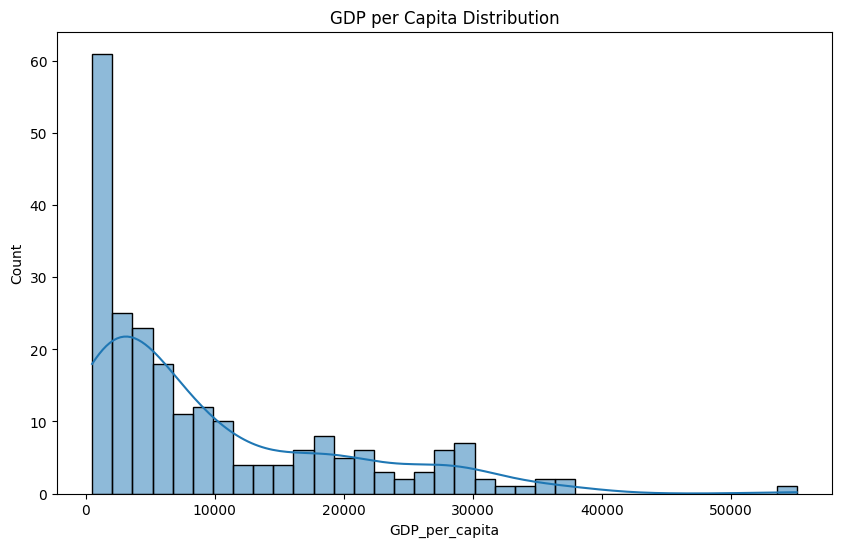

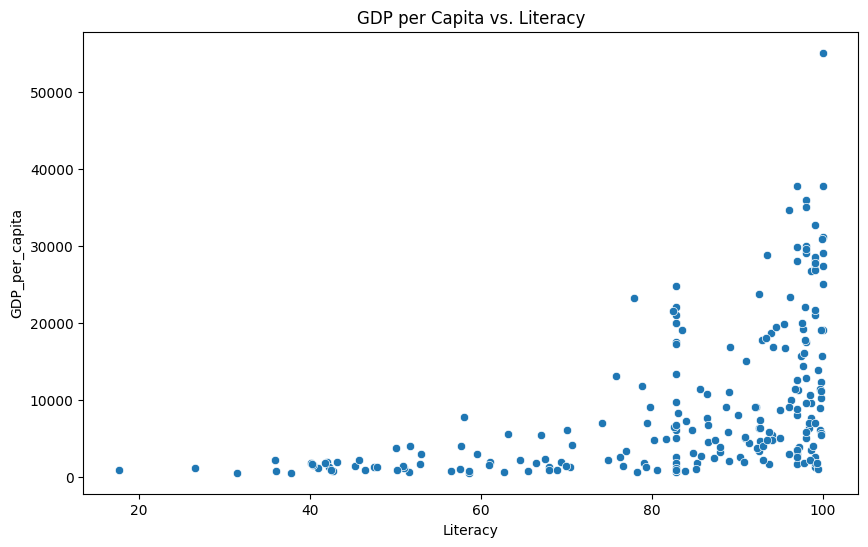

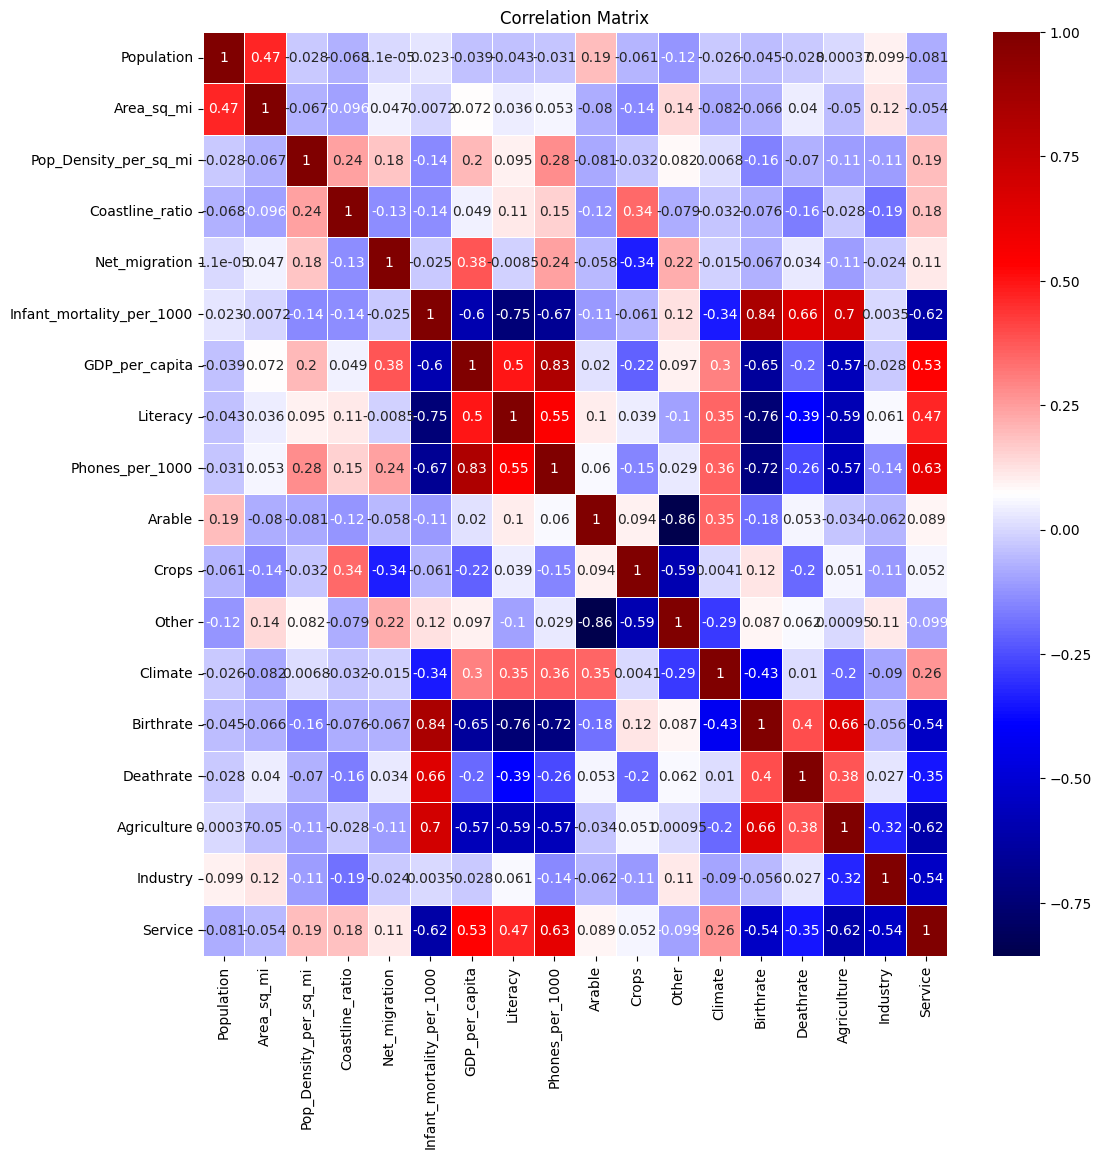

In [6]:
# Histogram of GDP per capita
plt.figure(figsize=(10, 6))
sns.histplot(gdp_data['GDP_per_capita'], bins=35, kde=True)
plt.title('GDP per Capita Distribution')
plt.show()

# Scatter plot of GDP per capita vs. Literacy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Literacy', y='GDP_per_capita', data=gdp_data)
plt.title('GDP per Capita vs. Literacy')
plt.show()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# 3. Selection of "Six" features 
#### { 'Population', 'Literacy', 'Phones_per_1000', 'Crops', 'Industry', 'Service' }

# 4. Model Building

## 4.1 Target To The Selected Features & Split The Data

In [7]:
# Features and target variable
features = ['Population', 'Literacy', 'Phones_per_1000', 'Crops', 'Industry', 'Service']
X = gdp_data[features]
y = gdp_data['GDP_per_capita']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4.2 Linear Model

In [8]:
# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the linear model
print('Linear Model R²:', r2_score(y_test, y_pred_linear))
print('Linear Model MAE:', mean_absolute_error(y_test, y_pred_linear))
print('Linear Model MSE:', mean_squared_error(y_test, y_pred_linear))


Linear Model R²: 0.7550263488521636
Linear Model MAE: 3342.6763488003926
Linear Model MSE: 20370912.46817035


### 4.3 Non-Linear Model

In [9]:
# Random Forest model
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters for Random Forest
print("Best parameters found: ", grid_search_rf.best_params_)

# Train Random Forest model with best parameters
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
print('Random Forest R²:', r2_score(y_test, y_pred_rf))
print('Random Forest MAE:', mean_absolute_error(y_test, y_pred_rf))
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest R²: 0.808852592155684
Random Forest MAE: 2546.028732717176
Random Forest MSE: 15894962.970382335


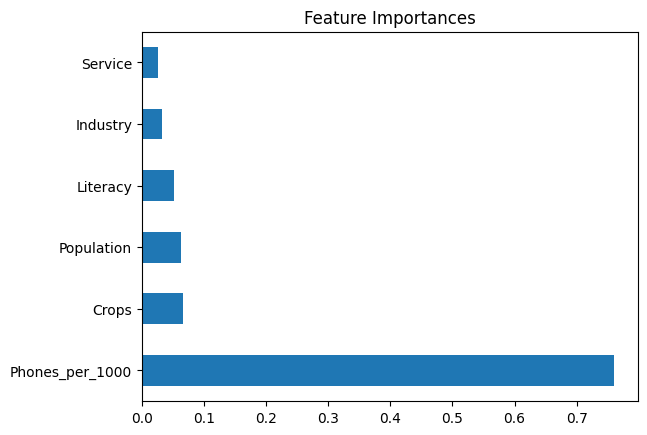

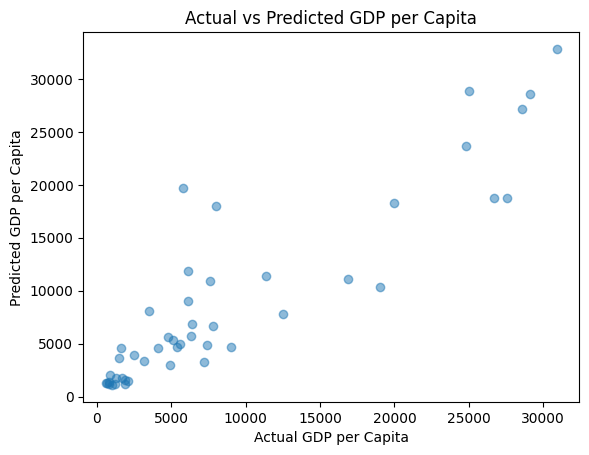

In [10]:
# Visualize feature importances
feature_importances = pd.Series(best_rf_model.feature_importances_, index=features)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

# Visualize actual vs predicted for Random Forest
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual GDP per Capita')
plt.ylabel('Predicted GDP per Capita')
plt.title('Actual vs Predicted GDP per Capita')
plt.show()